# Data Analysis and Data Science
## Putting it all together

Assignment designed by Caroline Labelle
<br>For: BIM6065-C

<br> All answers in "Data Analysis III: Putting it all together!" were written by Alya Zeinaty

<br>
Date: July 7th 2022

<hr style="border:1px solid black"> </hr>


In [1]:
### Import sklearn
import sklearn.decomposition
import sklearn.cluster

### Import scipy
import scipy

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Data Analysis II: k-means for clustering datapoints

In [3]:
### Import and clean the penguins dataset
data_penguin = pd.read_csv("palmer_penguins.csv", sep=",", header=0)
data_penguin.dropna(axis="index", inplace=True)
data_penguin = data_penguin.reset_index(drop=True)

In [4]:
### Do dimensionality reduction through PCA
X = data_penguin.iloc[:, 2:6]

# Data scaling
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) 

# Initiate the PCA and apply it to the scaled data
pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(X_scaled)

# Apply the dimensionality reduction to our data
X_reduce = pca.fit_transform(X_scaled)

reduce_penguin = pd.DataFrame(X_reduce)
reduce_penguin["species"] = data_penguin.species
reduce_penguin["island"] = data_penguin.island
reduce_penguin["sex"] = data_penguin.sex

In [5]:
reduce_penguin.columns

Index([0, 1, 2, 3, 'species', 'island', 'sex'], dtype='object')

In [6]:
reduce_penguin.columns=['PC0', 'PC1', 'PC2', "PC3", 'species', 'island', 'sex']

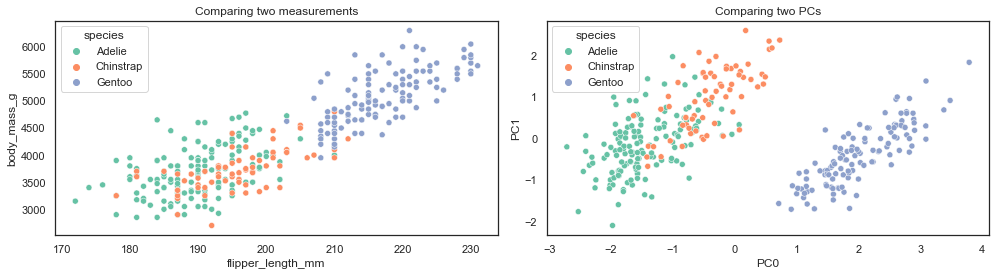

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.scatterplot(data=data_penguin, x="flipper_length_mm", y="body_mass_g", hue="species", ax=ax[0])
ax[0].set_title("Comparing two measurements")

sns.scatterplot(data=reduce_penguin, x="PC0", y='PC1', hue="species", ax=ax[1])
ax[1].set_title("Comparing two PCs")

plt.tight_layout()
plt.show()

We wish to group similar samples and compare the groups to catagorical labels.

### k-means with scikit-learn

The KMeans algorithm clusters data by trying to separate samples in $n$ groups of equal variance, minimizing a criterion known as **within-cluster sum-of-squares**.

This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

At a glance, the k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_{j}$ of the samples in the cluster $C_{j}$. 

*In very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.*

Ressource: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [8]:
data_penguin.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Let's apply the k-means algorithm to the first two principal component of the Iris dataset. **Are we able to cluster pengouins based on the species?

In [9]:
### Define the data

P = data_penguin[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']]
P.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [10]:
### Initiate the k-means alogirthm
### How many clusters should we use?
K = 3
kmean = sklearn.cluster.KMeans(n_clusters=K)
kmean

KMeans(n_clusters=3)

In [11]:
### Apply kmeans to our data
kmeans_P = kmean.fit(P)

**Attributes of the kmeans object:**

<code>kmeans.cluster_centers_</code>: coordinates of cluster centers

<code>kmeans.labels_</code>: labels of each point

In [12]:
### Get centroids coordinate
kmeans_P.cluster_centers_

array([[  41.2863354 ,   18.03726708,  190.08695652, 3522.04968944],
       [  48.93571429,   15.53142857,  220.61428571, 5435.35714286],
       [  44.87254902,   16.90882353,  204.65686275, 4445.34313725]])

In [13]:
### Get datapoints labels
kmeans_P.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,

In [14]:
### Add the cluster column
data_penguin.loc[:,"cluster"]=kmeans_P.labels_

In [15]:
data_penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0
...,...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,2
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,2
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,1
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,1


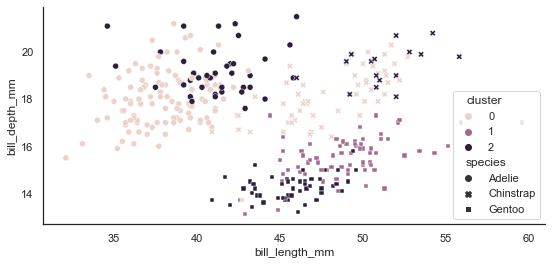

In [16]:
### Plot the cluster and the labels
sns.scatterplot(data=data_penguin, x='bill_length_mm', y='bill_depth_mm', hue='cluster', style='species')
sns.despine()

It is not always easy to define the number of cluster to use!

The most common approach for deciding the value of $K$ is the so-called elbow method. It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

<code>inertia_</code>: sum of squared distances of samples to their closest cluster center

In [17]:
### Get the inertia of our initial kmean
kmeans_P.inertia_

28336434.86573109

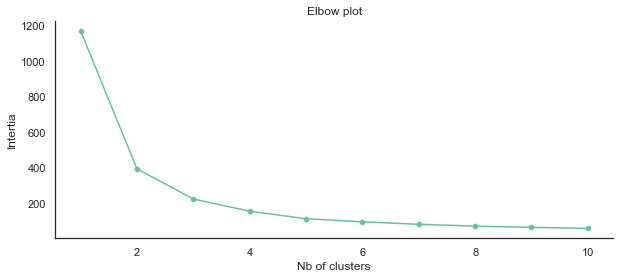

In [18]:
### Run kmeans for various k values
### initiate empty list
inertia_list = []

X = reduce_penguin.iloc[:, 0:2]

### Create for loop for K from 1 to 10
for k in range(1, 11) :
    kmean = sklearn.cluster.KMeans(n_clusters=k)
    kmeans_X = kmean.fit(X)
    
    ## Add the inertia to the list
    inertia_list += [kmeans_X.inertia_]
    
### Plot K vs. intertia
plt.figure(figsize=(10, 4))
sns.lineplot(x=np.arange(1, 11), y=inertia_list)
sns.scatterplot(x=np.arange(1, 11), y=inertia_list)

plt.title("Elbow plot")
plt.xlabel("Nb of clusters")
plt.ylabel("Intertia")

sns.despine()

## Data Analysis III: Putting it all together!

You are given a dataset of gene experissions for $N$ samples. Each sample represent a breast cancer patient. 
The dataset comprises two TSV files:
* `patient_expression.tsv`: contains the expressions of $M$ genes for each of the `N` patients;
* `patient_subtype.tsv`: contains the clinical classification of each patient;

The order is the same for all files.

You wonder if you can cluster patient, from their expression profil, by clinical classification.
** The expression values are already log-transformed

### Create a dataframe of the data

In [19]:
df_expression=pd.read_csv('breast_cancer_expression.tsv', sep='\t')
df_subtype=pd.read_csv('breast_cancer_subtype.tsv', sep='\t', header=None)

In [20]:
df_expression

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,2.522965,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,1.989089,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.953431,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,0.820314,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823


In [21]:
df_subtype

,0
0,Basal
1,Basal
2,Basal
3,Basal
4,Basal
...,...
640,Normal
641,Normal
642,Normal
643,Normal


In [22]:
df_subtype.columns=['Subtype']

In [23]:
df=pd.concat([df_subtype, df_expression],axis=1)#the merged dataset

In [24]:
df

,Subtype,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
0,Basal,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,Basal,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,Basal,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,Basal,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,Basal,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,Normal,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,...,2.522965,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799
641,Normal,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,...,1.989089,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657
642,Normal,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,...,1.953431,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375
643,Normal,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,...,0.820314,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823


### Explore the data [35 points]

<hr>

#### Part 1 [15 points]
Answer the following questions:
1. How many patients are you considering?
2. How many genes are you considering?
3. Is there a pair of genes that seems to be linearly correlated? If yes, which genes and what is the correlation coefficient?

In [25]:
print('We are considering '+str(len(df))+' patients.')

We are considering 645 patients.


In [26]:
print('We are considering '+str(df_expression.shape[1])+' genes.')

We are considering 47 genes.


In [27]:
df.corr().style.background_gradient(cmap='coolwarm')

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,ENSG00000101057.14,ENSG00000104332.10,ENSG00000105173.12,ENSG00000106605.9,ENSG00000107262.15,ENSG00000115648.12,ENSG00000117399.12,ENSG00000117724.11,ENSG00000128422.14,ENSG00000129514.5,ENSG00000133627.16,ENSG00000134057.13,ENSG00000135679.20,ENSG00000136997.13,ENSG00000138180.14,ENSG00000141424.11,ENSG00000141736.12,ENSG00000141738.12,ENSG00000142945.11,ENSG00000146648.14,ENSG00000148773.11,ENSG00000151715.6,ENSG00000160867.13,ENSG00000164611.11,ENSG00000165304.6,ENSG00000171428.12,ENSG00000171604.10,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
ENSG00000011426.9,1.000000,0.430483,0.465782,0.642946,-0.412403,0.665284,-0.478770,0.381511,0.540337,-0.033782,0.679021,0.319351,0.577376,-0.199308,-0.344893,-0.564624,0.692511,0.806143,0.284299,-0.483688,0.243371,0.668501,-0.072376,0.224435,0.804597,-0.362391,-0.043074,0.090457,0.757299,0.392233,0.777759,-0.255185,0.097476,0.586306,0.795679,-0.407946,-0.406660,-0.423191,0.698216,-0.338931,0.782304,0.680049,0.612719,0.286160,0.175169,-0.507368,0.278548
ENSG00000054598.6,0.430483,1.000000,0.648444,0.255263,-0.480835,0.355715,-0.711480,0.575532,0.097505,-0.304248,0.352217,0.809776,0.589579,-0.505157,-0.207393,-0.837719,0.526274,0.363653,0.666493,-0.887987,0.604482,0.223113,-0.304142,0.459418,0.420049,-0.593818,-0.358730,-0.144562,0.461043,0.587946,0.301565,-0.521876,-0.088578,0.372344,0.452683,-0.615595,-0.697257,-0.454004,0.174346,-0.679272,0.423911,0.359143,0.402607,0.649784,0.571761,-0.600161,0.768696
ENSG00000062038.12,0.465782,0.648444,1.000000,0.302321,-0.434638,0.367152,-0.677949,0.526901,0.208175,-0.091800,0.447822,0.643312,0.570142,-0.298215,-0.327094,-0.690486,0.546950,0.360487,0.654297,-0.681639,0.375039,0.279612,-0.334811,0.334500,0.446793,-0.563122,-0.126617,0.065658,0.488574,0.545330,0.324726,-0.245741,0.043208,0.391729,0.444418,-0.557383,-0.555143,-0.542426,0.256130,-0.580916,0.441518,0.398492,0.360091,0.635977,0.512390,-0.552245,0.571086
ENSG00000077152.8,0.642946,0.255263,0.302321,1.000000,-0.358534,0.766739,-0.321786,0.399084,0.624781,-0.053282,0.740112,0.137357,0.539352,-0.020864,-0.201782,-0.372946,0.729246,0.715855,0.122392,-0.305800,0.310387,0.803500,-0.108766,0.185542,0.756170,-0.267473,0.010703,0.161457,0.746594,0.051011,0.622020,-0.288203,0.189365,0.786688,0.736354,-0.249344,-0.237741,-0.382176,0.674114,-0.231214,0.778496,0.809930,0.632519,0.107836,0.005073,-0.355481,0.196020
ENSG00000082175.13,-0.412403,-0.480835,-0.434638,-0.358534,1.000000,-0.460090,0.651123,-0.474405,-0.294215,0.132450,-0.499361,-0.390393,-0.523670,0.220578,0.245550,0.525697,-0.519392,-0.311510,-0.384193,0.536870,-0.314661,-0.314927,0.268393,-0.143669,-0.452568,0.558742,-0.047262,-0.188013,-0.476187,-0.388534,-0.346315,0.246741,-0.303922,-0.438500,-0.454319,0.611141,0.473553,0.567106,-0.424408,0.366383,-0.414027,-0.479137,-0.318270,-0.368181,-0.269348,0.706085,-0.383635
ENSG00000089685.13,0.665284,0.355715,0.367152,0.766739,-0.460090,1.000000,-0.424606,0.484181,0.613192,-0.052604,0.825345,0.258825,0.628338,-0.057471,-0.226348,-0.497804,0.834885,0.664948,0.263808,-0.445959,0.305676,0.785069,-0.116014,0.307475,0.805205,-0.349339,-0.106206,0.034499,0.859190,0.170459,0.702448,-0.365325,0.190045,0.816911,0.761547,-0.432974,-0.293545,-0.436430,0.727020,-0.374365,0.768707,0.861651,0.713120,0.249180,0.155389,-0.463118,0.308297
ENSG00000091831.20,-0.478770,-0.711480,-0.677949,-0.321786,0.651123,-0.424606,1.000000,-0.632017,-0.236865,0.110585,-0.498571,-0.659073,-0.626639,0.365513,0.353410,0.771406,-0.595691,-0.323580,-0.612582,0.771747,-0.458042,-0.276523,0.498102,-0.261893,-0.459795,0.802996,0.020702,-0.182297,-0.519082,-0.628315,-0.340499,0.203646,-0.242026,-0.439325,-0.4757

In [28]:
max_corr=0
genes=[]
for index in df.corr().index:
    row=df.corr().loc[index, :]
    for i in range(len(row)):
        if row[i]<1 and abs(row[i])>abs(max_corr):
            max_corr=row[i]
            genes=[index, df.columns[i]]
print('The maximum correlation is '+str(max_corr)+' for the genes '+ str(genes)+".")


The maximum correlation is 0.917607441853726 for the genes ['ENSG00000117399.12', 'ENSG00000141738.12'].


<hr>

#### Part 2 [20 points]
Visually inspect your dataset by generating at least two (2) graphs. For each visualisation you should:
* State what you are exploring;
* Plot comprehensive graphs (title, axis-labels, legend if necesssary);
* Give a concise interpretation of the results.

We are exploring the differential expression of each gene based on subtype, in the global population. This will give us an idea of the genes that might be specific to a tumor subtype for example. 

C:\Users\Alya\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


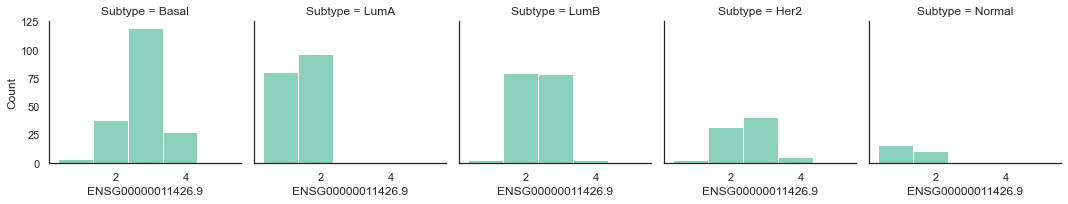

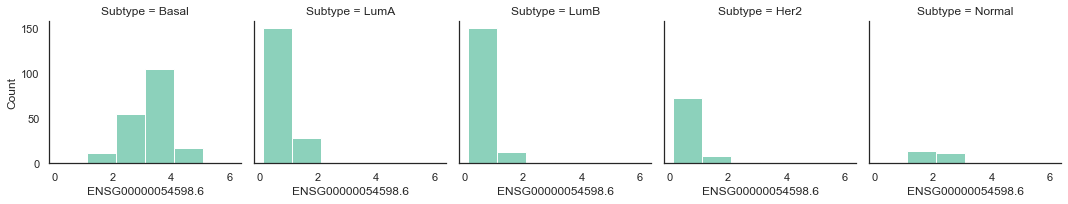

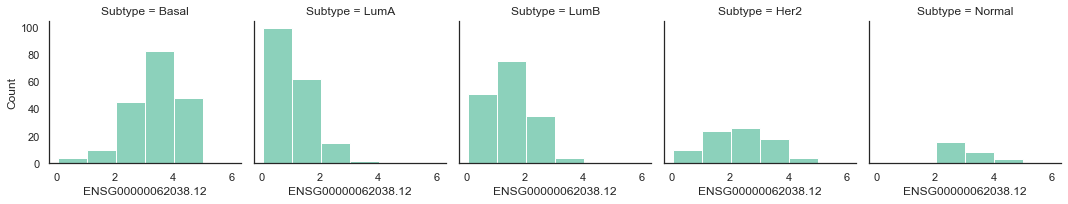

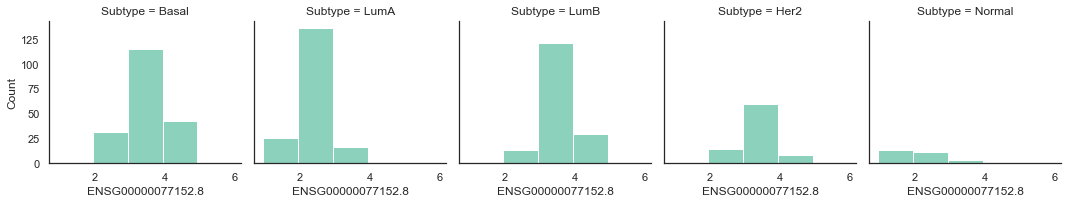

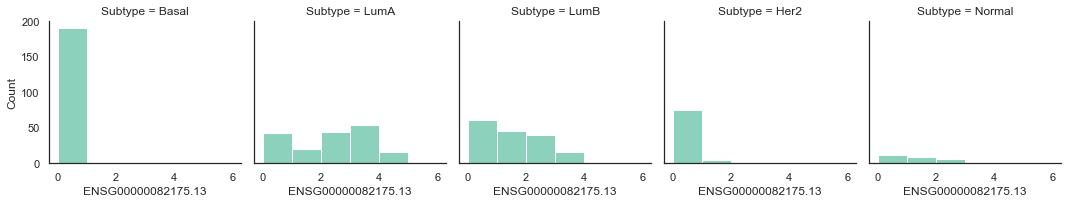

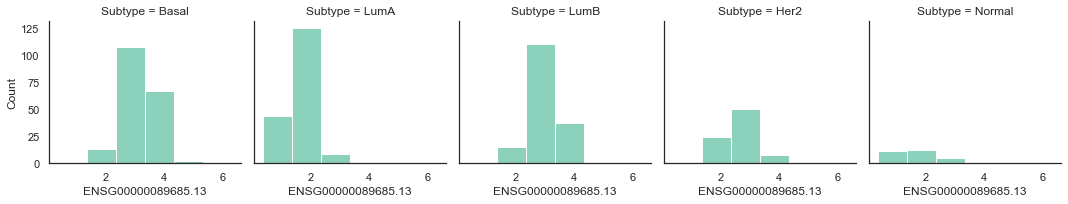

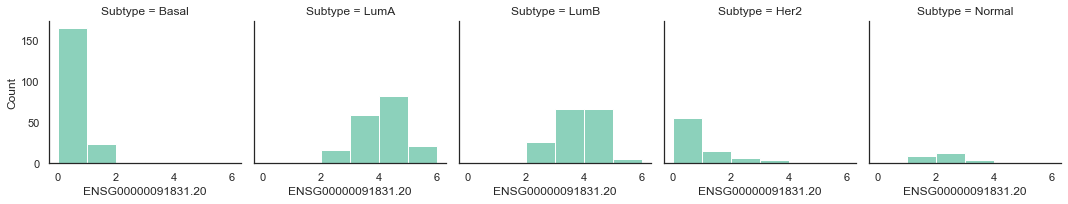

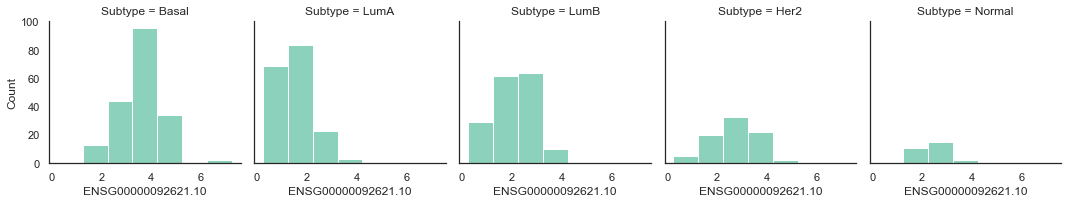

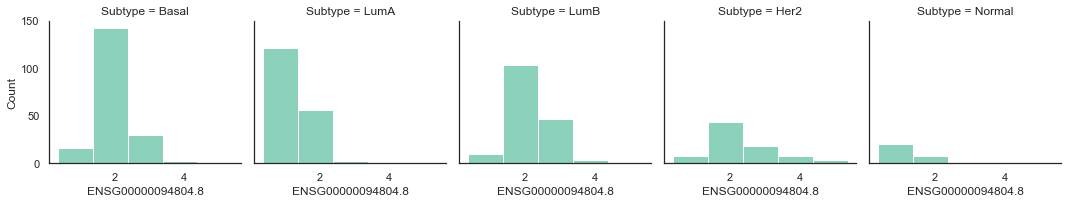

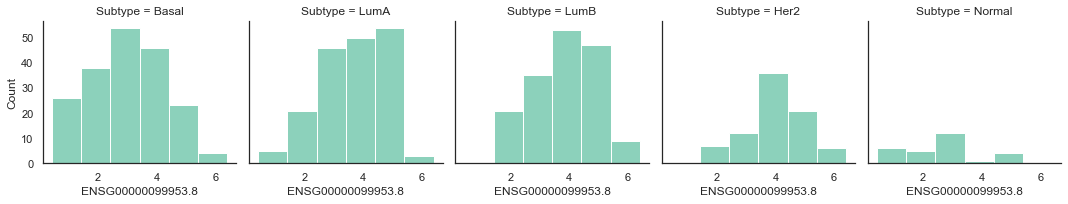

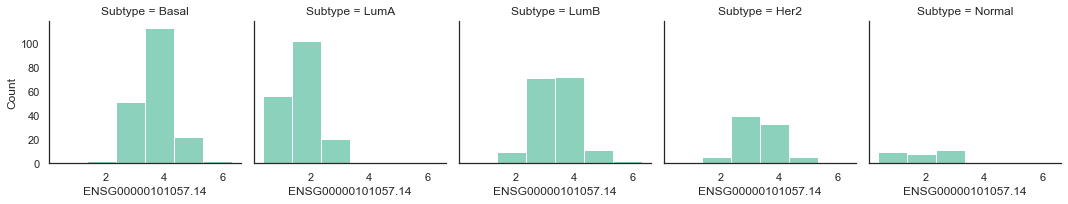

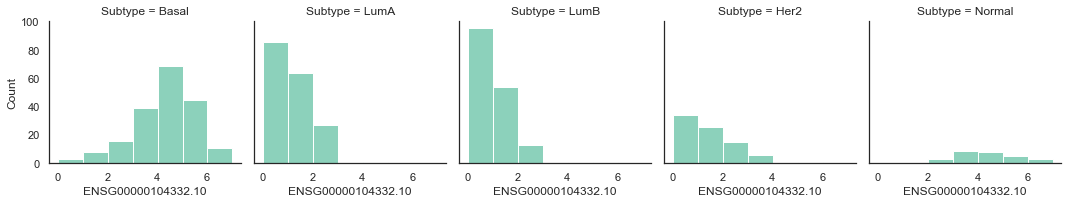

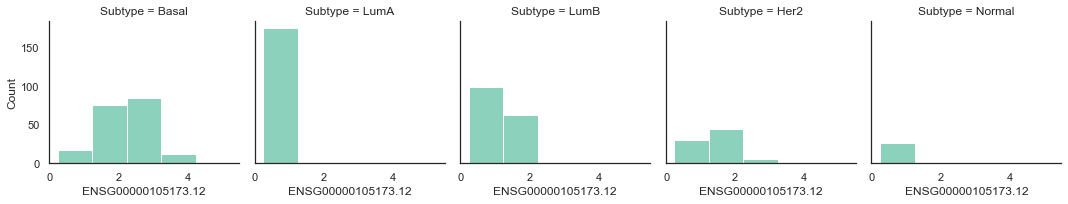

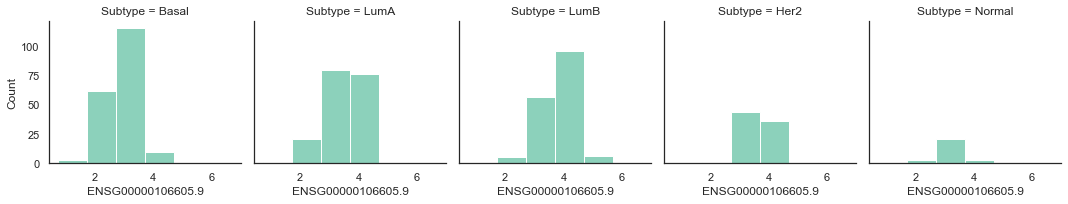

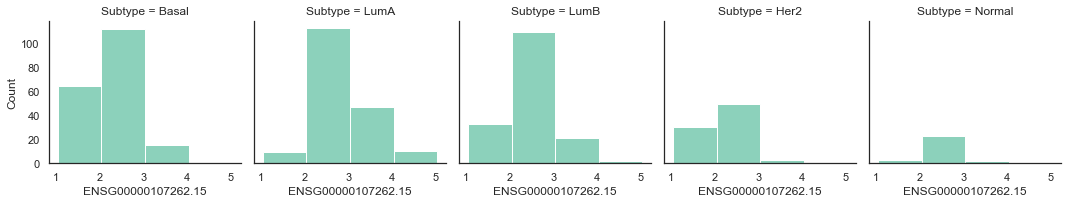

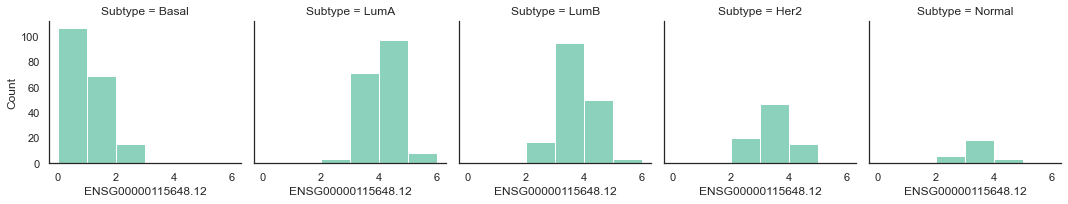

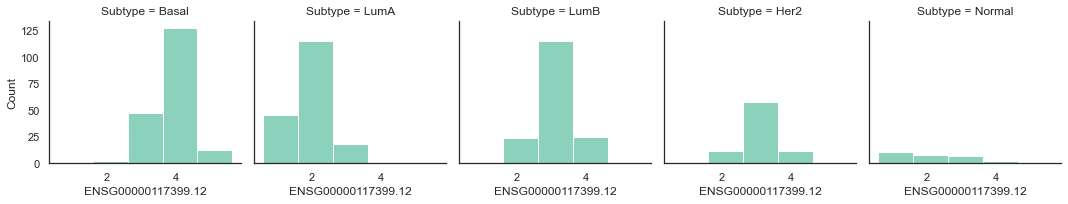

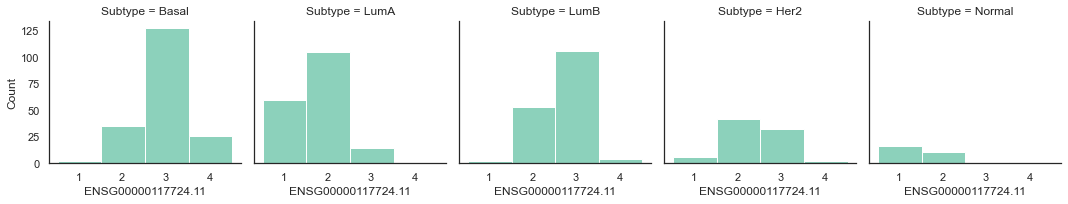

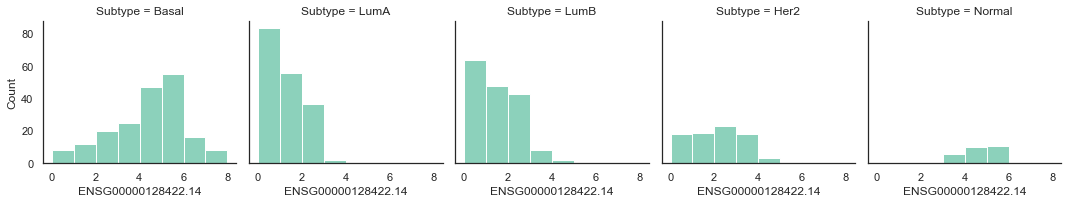

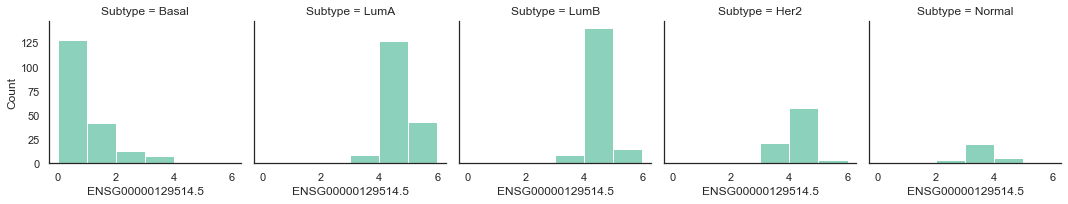

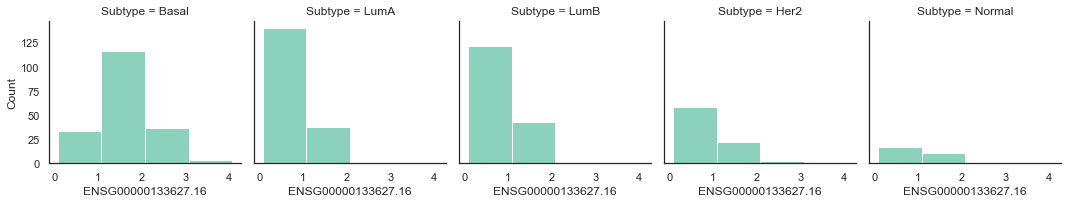

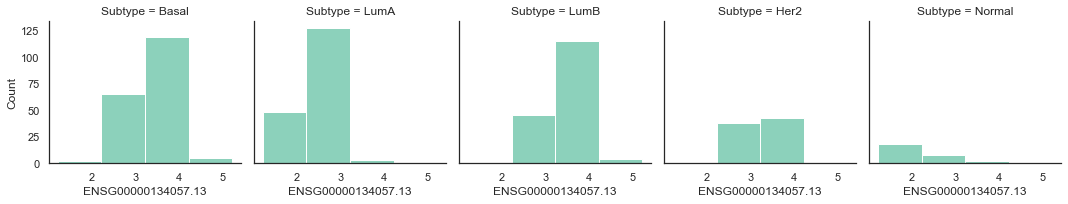

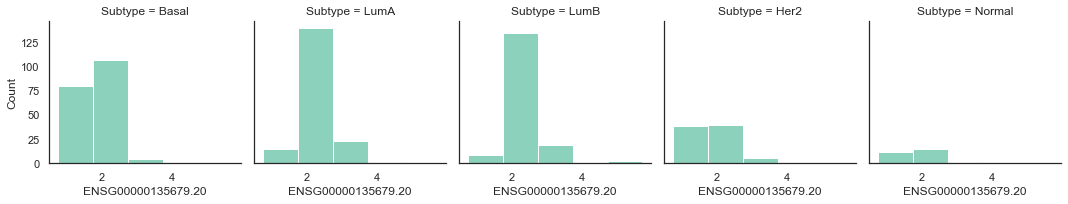

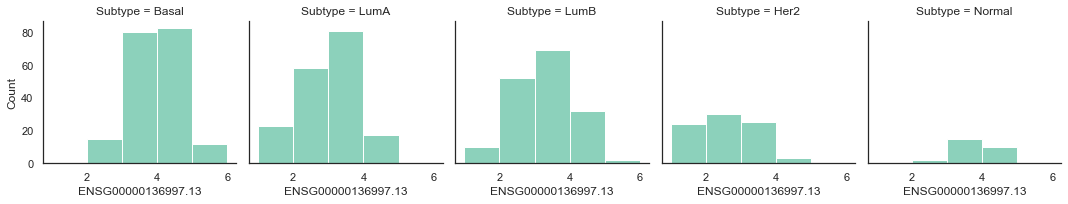

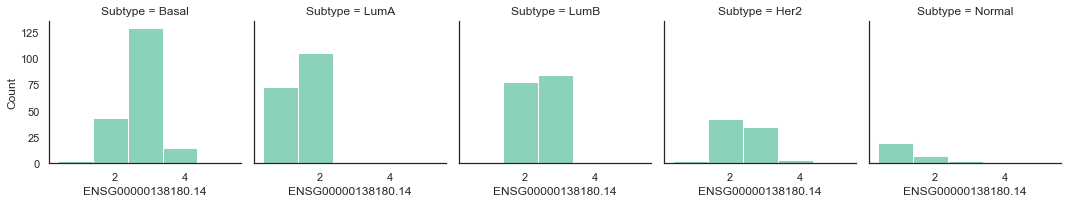

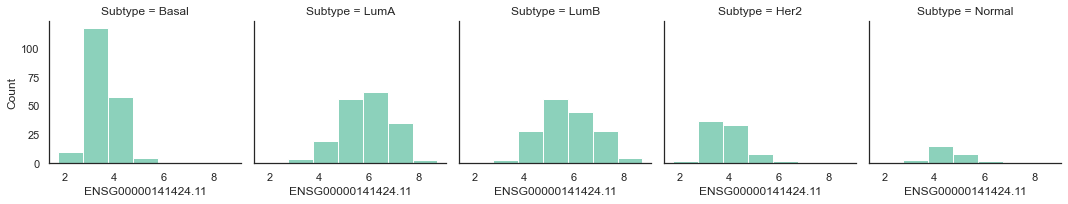

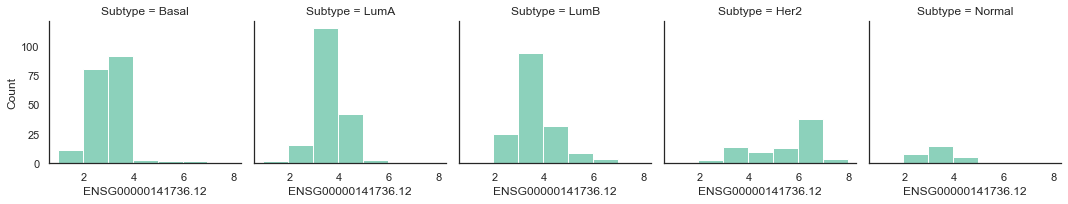

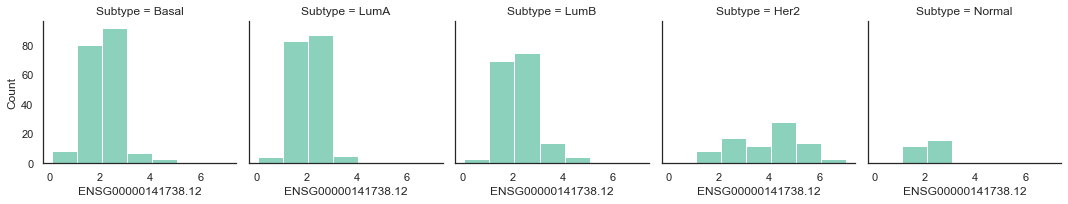

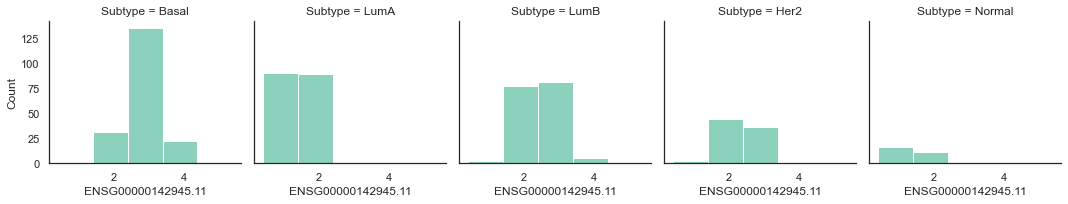

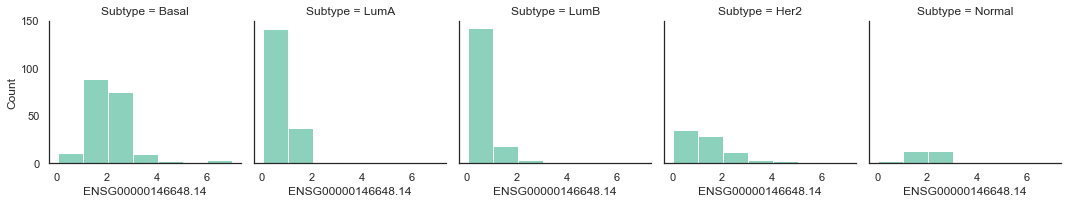

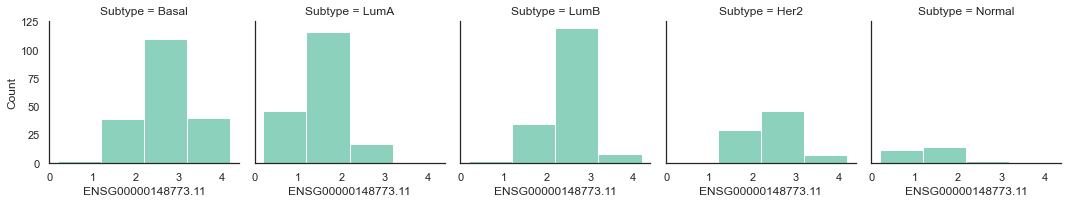

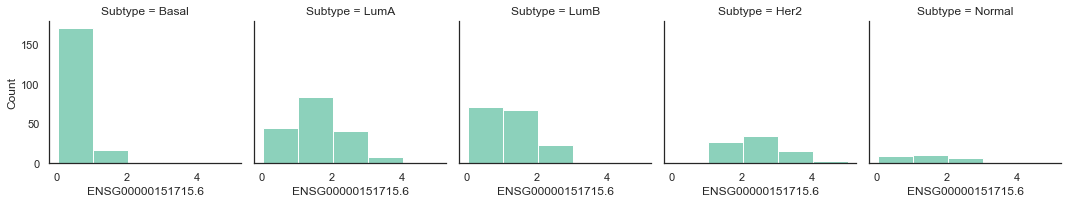

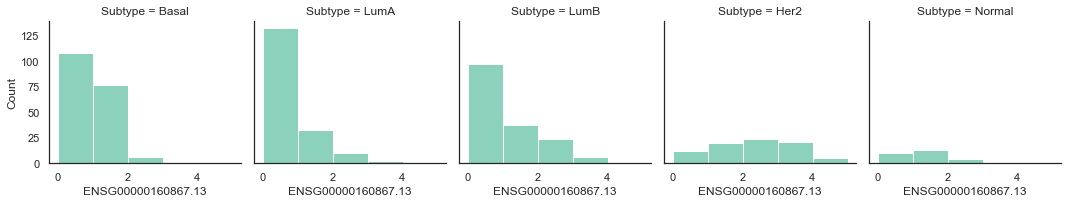

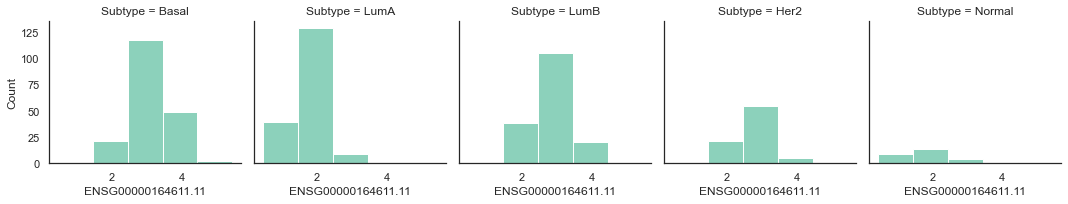

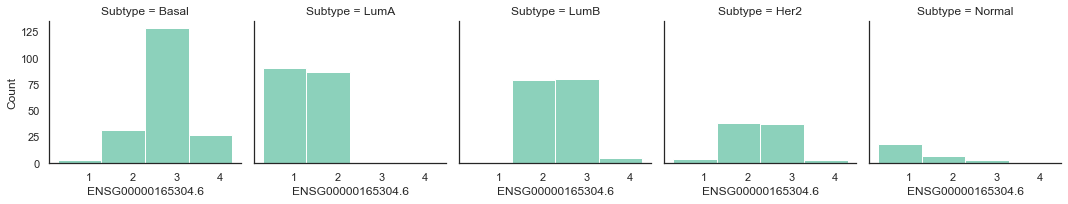

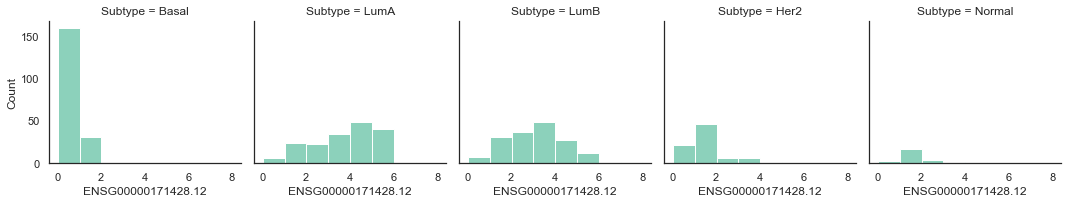

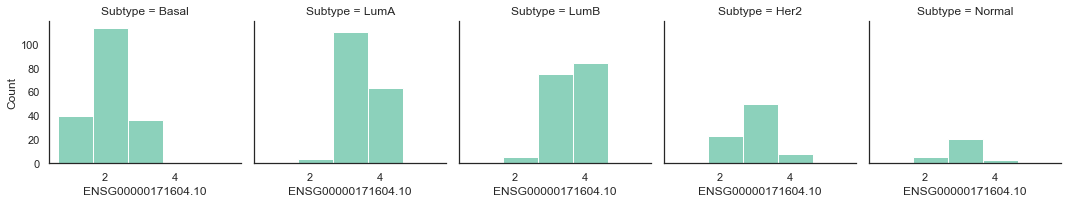

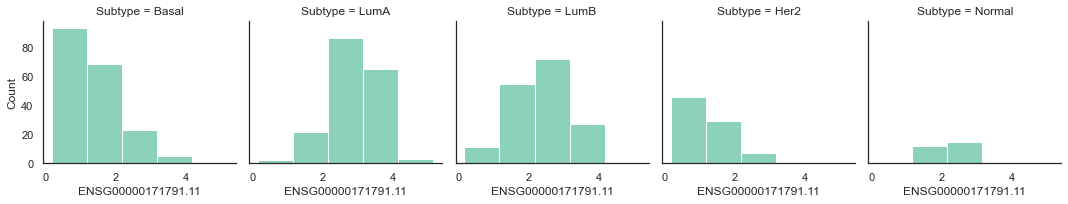

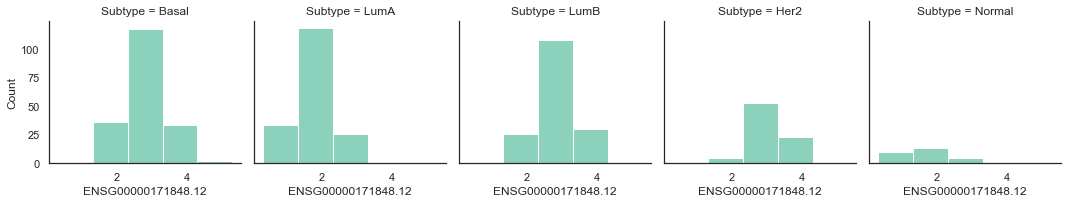

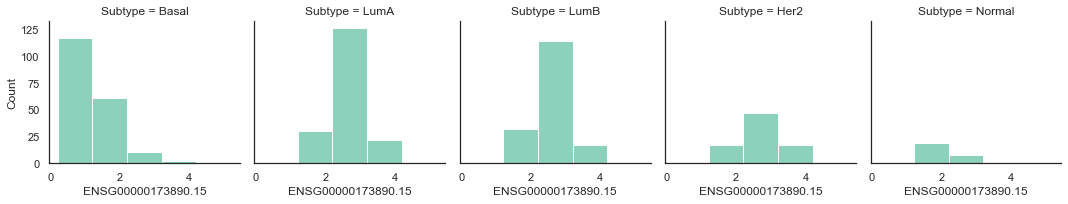

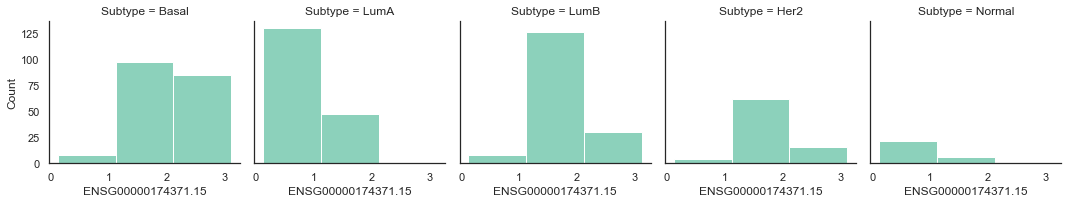

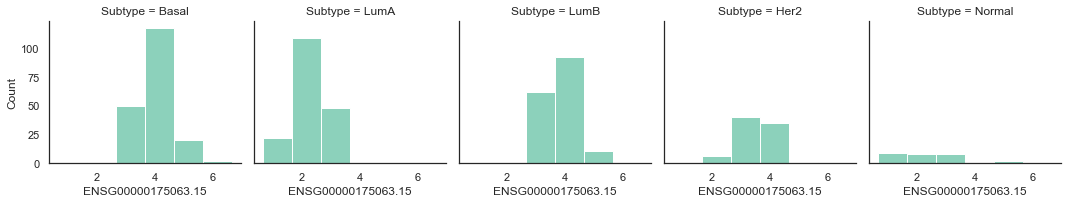

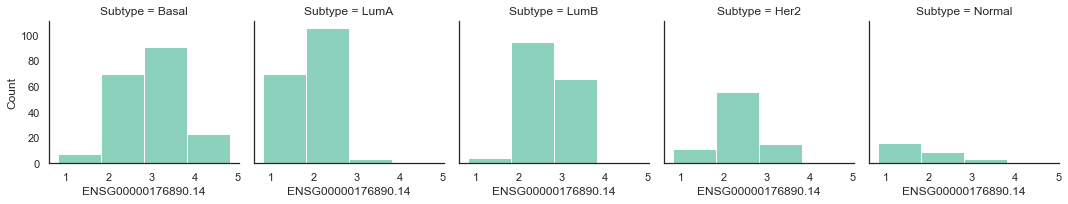

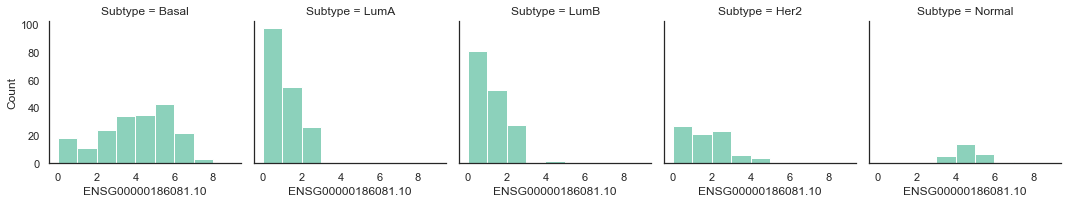

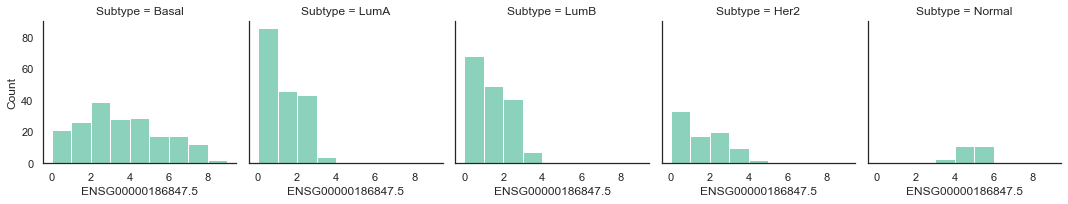

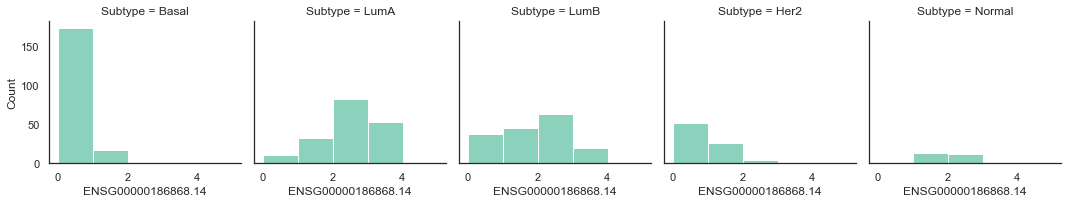

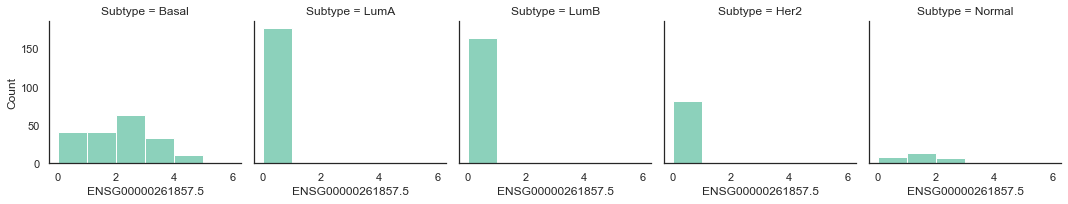

In [29]:
for gene in df_expression.columns:
    sns.displot(
    df, x=gene, 
    binwidth=1, height=3, col='Subtype'
    )

In [30]:
print("Some genes are expressed differentially in different subtypes, e.g.ENSG00000261857.5, ENSG00000176890.14, etc. Some genes are really interesting in the sense  that they are only overexpressed in one subtype, likely allowing us to use them as an identificator of a tumor subtype (i.e. ENSG00000089685.13)")

Some genes are expressed differentially in different subtypes, e.g.ENSG00000261857.5, ENSG00000176890.14, etc. Some genes are really interesting in the sense  that they are only overexpressed in one subtype, likely allowing us to use them as an identificator of a tumor subtype (i.e. ENSG00000089685.13)


<hr style="border:1px solid black"> </hr>

### Analyse the data [60 points]

You are wondering if it would be possible to group patients in various subsets. 

<hr>

#### Part 1 [20 points]

Using the methods presented in previous class, are you able to group patients in various subsets?

Make sure that each step of your analysis is clearly identifiable. When you make decision regarding algorithm parameters, make sure to justify them with a short sentence and a plot (if applicable).

For each results generated, give a concise interpretation.

[0.4895715  0.12409806 0.06368292 0.05613526 0.0267468  0.02349892
 0.0187674  0.01808644 0.01589401 0.01387009]
[135.01395591  67.9756061   48.69474305  45.71813034  31.55778274
  29.57975351  26.43459404  25.95058155  24.32693544  22.72533101]
We can use between 2 and 4 PCs.


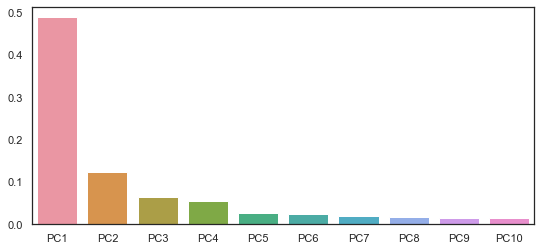

In [31]:
#Doing a PCA
### Apply the dimensionality reduction to our data
### Plot the results of the reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X=df.iloc[:, 1:]
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


## Plot the explained_variance_ratio_
sns.barplot(x=["PC{number}".format(number=str(i+1)) for i in range (len(pca.explained_variance_ratio_))], y=pca.explained_variance_ratio_)
### How many PC should we use?
print('We can use between 2 and 4 PCs.')

Deux principal components ne permettent pas de séparer les sous types de manière stricte, mais une tendance se détache; il est probable qu'en rajoutant le 3e et 4e PC, on puisse discriminer clairement entre les sous-types.


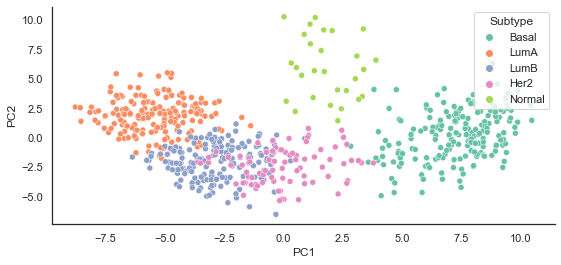

In [32]:
#Obtenir la dataframe des PCs
final_df_pca=pca.fit_transform(X)
final_df_pca=pd.DataFrame(final_df_pca)
#Nommer les colonnes
final_df_pca.columns=["PC{number}".format(number=str(i+1)) for i in range (len(pca.explained_variance_ratio_))]
#Rajouter la colonne Tumors type
final_df_pca['Subtype']=df['Subtype']
#Plot le graph
sns.scatterplot(data=final_df_pca, x='PC1', y='PC2', hue='Subtype')
sns.despine()
print("Deux principal components ne permettent pas de séparer les sous types de manière stricte, mais une tendance se détache; il est probable qu'en rajoutant le 3e et 4e PC, on puisse discriminer clairement entre les sous-types.")

In [33]:
#Doing a Kmeans
#Getting the data --> The data is X
### How many clusters should we use? 5 for the 5 subtypes
K = 5
kmean = sklearn.cluster.KMeans(n_clusters=K)
kmeans_X= kmean.fit(X)

In [34]:
### Get centroids coordinate
kmeans_X.cluster_centers_

array([[2.75910044, 3.27365992, 3.37047454, 3.53049586, 0.12939637,
        3.16946017, 0.47004937, 3.59464447, 1.99200603, 2.9966028 ,
        3.68971097, 4.32556676, 2.25507979, 2.91316203, 2.28307694,
        0.95262293, 3.88841152, 2.92227447, 4.39892131, 0.90522026,
        1.65229872, 3.40629028, 1.80391649, 3.97676579, 2.72662403,
        3.56432117, 2.96620419, 2.14217521, 2.86612443, 2.07542764,
        2.68738206, 0.41692115, 0.98139654, 3.10159689, 2.72250094,
        0.69202954, 2.16087069, 1.33734841, 2.7999624 , 1.15272471,
        2.06562811, 4.07832665, 3.00143934, 4.02835724, 3.61523803,
        0.41386396, 2.13676126],
       [2.31160411, 0.69970022, 1.45028608, 3.51015763, 1.49359608,
        2.94772328, 3.8760447 , 2.03001438, 2.12332275, 3.83623764,
        3.34841418, 0.97263858, 1.20933133, 3.83448018, 2.50437825,
        3.78204317, 3.09544636, 2.66857709, 1.42497889, 4.58326249,
        0.94236586, 3.42774593, 2.30538834, 3.26484264, 2.38929154,
        5.76617

In [35]:
### Add the cluster column
df["Cluster"]=kmeans_X.labels_

In [36]:
pca_kmeans=final_df_pca.copy()
pca_kmeans["Cluster"]=kmeans_X.labels_

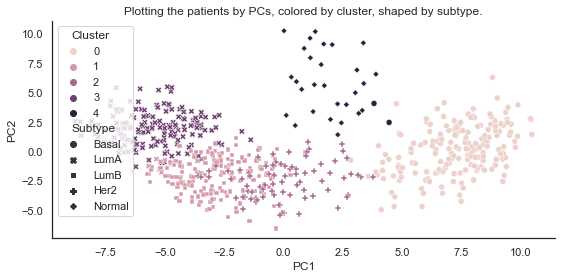

In [37]:
### Plot the cluster and the labels
sns.scatterplot(data=pca_kmeans, hue='Cluster', x='PC1', y='PC2', style="Subtype")
plt.title("Plotting the patients by PCs, colored by cluster, shaped by subtype.")
sns.despine()

In [38]:
print("Clustering the data by kmeans clusters does not seem to allow us to perfectly distinguish between the subtypes.")

Clustering the data by kmeans clusters does not seem to allow us to perfectly distinguish between the subtypes.


It is not always easy to define the number of clusters to use!

The most common approach for deciding the value of $K$ is the so-called elbow method. It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

<code>inertia_</code>: sum of squared distances of samples to their closest cluster center

In [39]:
### Get the inertia of our initial kmean
kmeans_X.inertia_

15731.092270991303

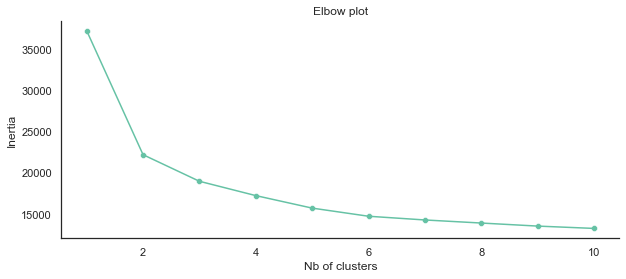

In [40]:
### Run kmeans for various k values
### initiate empty list
inertia_list = []

X = df_expression

### Create for loop for K from 1 to 10
for k in range(1, 11) :
    kmean = sklearn.cluster.KMeans(n_clusters=k)
    kmeans_X = kmean.fit(X)
    
    ## Add the inertia to the list
    inertia_list += [kmeans_X.inertia_]
    
### Plot K vs. intertia
plt.figure(figsize=(10, 4))
sns.lineplot(x=np.arange(1, 11), y=inertia_list)
sns.scatterplot(x=np.arange(1, 11), y=inertia_list)

plt.title("Elbow plot")
plt.xlabel("Nb of clusters")
plt.ylabel("Inertia")

sns.despine()

The ideal number of clusters based on inertia minimization would be 5, which makes sense, or higher, but that would force us to understand what the additional clusters can be identified as. 

Are you able to link each found cluster to a cancer subtype?

Not really,  but we can see a trend.

<hr>

#### Part 2

Go back the pair(s) of genes with high linear correlation. Do their expressions differ from one to subtype to another? If so, how?

In [41]:
genes

['ENSG00000117399.12', 'ENSG00000141738.12']

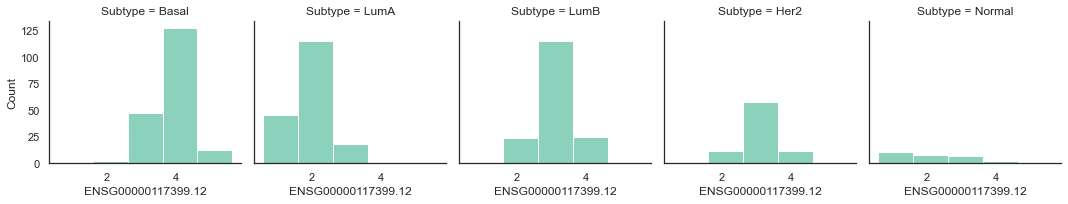

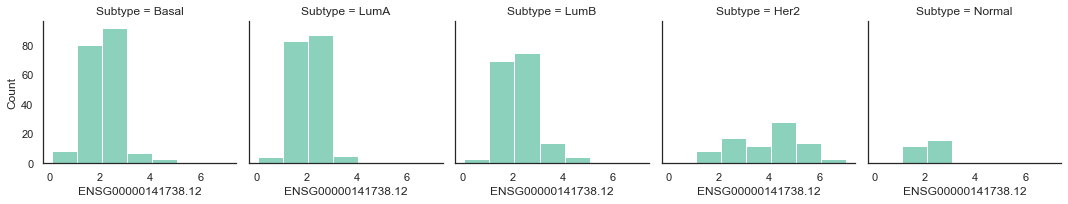

In [42]:
for gene in genes:
    sns.displot(
    df, x=gene, 
    binwidth=1, height=3, col='Subtype'
    )

In [43]:
print("The first gene "+genes[0]+" is on average a lot less expressed in the normal subtype.")
print("The second gene "+genes[1]+" is on average a lot less expressed in the normal subtype; it is also differentially expressed in the subtype Her2 than in the three subtypes Basal, LumA, LumB.")

The first gene ENSG00000117399.12 is on average a lot less expressed in the normal subtype.
The second gene ENSG00000141738.12 is on average a lot less expressed in the normal subtype; it is also differentially expressed in the subtype Her2 than in the three subtypes Basal, LumA, LumB.


<hr>

#### BONUS

For each cancer subtype, identify the most expressed gene (on average). Do you find a different gene for each cluster?

If you do a rapid literrature search, are there identified genes known to be linked to their respective subtype?

In [44]:
#get the most expressed gene by subtype on average
for subtype in df.Subtype.unique():
    print("The most expressed gene on average for the subtype "+subtype+ " is "+ str(df[df['Subtype']==subtype].mean(axis=0).idxmax(axis=1))+".")

The most expressed gene on average for the subtype Basal is ENSG00000128422.14.
The most expressed gene on average for the subtype LumA is ENSG00000141424.11.
The most expressed gene on average for the subtype LumB is ENSG00000141424.11.
The most expressed gene on average for the subtype Her2 is ENSG00000141736.12.
The most expressed gene on average for the subtype Normal is ENSG00000186847.5.


*KRT17 (ENSG00000128422) is prognostic, high expression is favorable in breast cancer. (https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjV3NKh6vn4AhUApIkEHeG1CJsQFnoECAoQAQ&url=http%3A%2F%2Fwww.proteinatlas.org%2FENSG00000128422-KRT17%2Fpathology%2Fbreast%2Bcancer&usg=AOvVaw2q800My0X_U6fql8fzhY2C). The basal-like molecular subtype correlated with high K17 expression in a high proportion of cases. (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6677817/)

*SLC39A6 (ENSG00000141424.11) is not prognostic in breast cancer, but was identified nonetheless as a LumA gene in this article (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8732329/).
Nothing found for the LumB gene. 

*However,  ENSG00000141736.12 (ERBB2) is evidently linked to the Her2 subtype as HER2 is commonly used to describe the protein encoded by the ERBB2 gene. 

*ENSG00000186847.5 (KRT14) is expressed in various cancers but I did not find any correlation between KRT14 and the normal subtype in breast cancer.